# Exploratory Data Analysis and Visualization in R



##  Data Manipulation
### Creating Vectors

In [3]:
A<-c(1:20)
B<-c(20:1)
suma<-A+B
print(suma)



 [1] 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21


### Analyzing and Visualizing North American River Lengths

This notebook calculates key statistical measures and visualizes the data distribution of river lengths in North America using a histogram.

              Statystyka     Wartość
1                   Suma  83357.0000
2                Średnia    591.1844
3                Mediana    425.0000
4              Wariancja 243908.4086
5 Odchylenie standardowe    493.8708
6                    Min    135.0000
7                    Max   3710.0000


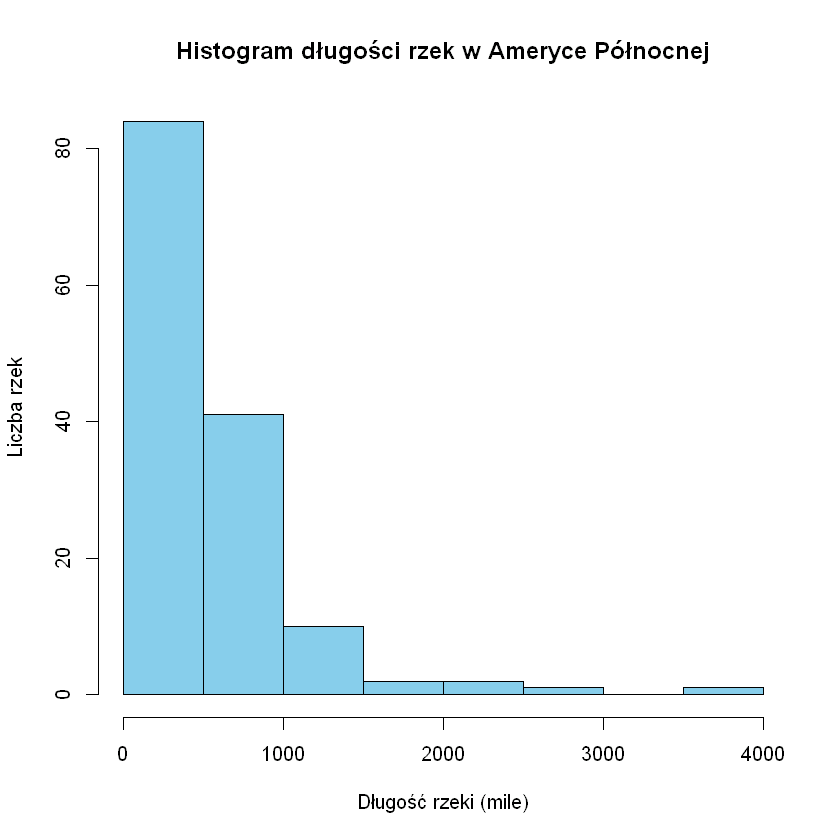

In [5]:
data(rivers)
info_rzeki <- data.frame(
  Statystyka = c("Suma", "Średnia", "Mediana", "Wariancja", "Odchylenie standardowe", "Min", "Max"),
  Wartość = c(sum(rivers), mean(rivers), median(rivers), var(rivers), sd(rivers), min(rivers), max(rivers))
)
print(info_rzeki)


hist(rivers, main = "Histogram długości rzek w Ameryce Północnej", 
     xlab = "Długość rzeki (mile)", ylab = "Liczba rzek", col = "skyblue", border = "black")


### Gravity Measurements and Model Visualization

This task involves importing gravity data, renaming columns for clarity, and visualizing measured and modeled gravity values along a profile using ggplot2.

,X,grav_measured,grav_modeled
,<dbl>,<dbl>,<dbl>
1,10.00000,18.90647,19.05831
2,10.90452,18.90947,19.05502
3,11.80904,18.91251,19.07310
4,12.71357,18.91559,19.11449
5,13.61809,18.91872,19.12802
6,14.52261,18.92190,19.09106


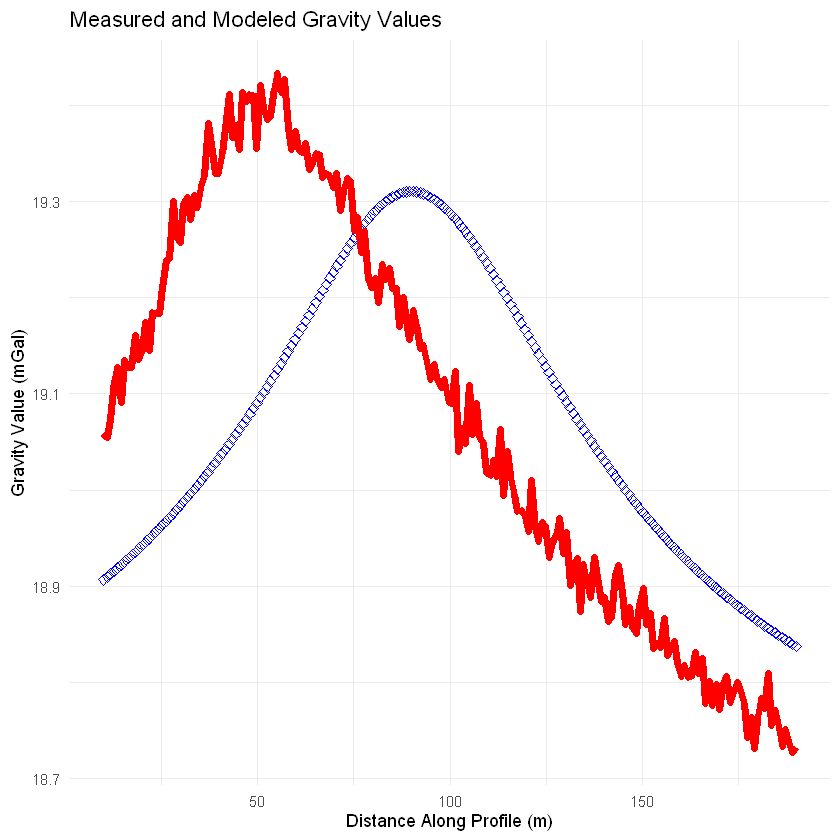

In [10]:
library(ggplot2)
gravity_data <- read.table("gravity.txt", header = FALSE)

names(gravity_data) <- c("X", "grav_measured", "grav_modeled")
head(gravity_data)
wykres <- ggplot(gravity_data, aes(x = X)) +
  geom_point(aes(y = grav_measured), color = "blue", shape = 23, size = 2) +  
  geom_line(aes(y = grav_modeled), color = "red", linewidth = 2) +  
labs(x = "Distance Along Profile (m)", y = "Gravity Value (mGal)",
       title = "Measured and Modeled Gravity Values")+
  theme_minimal()  


print(wykres)

### Custom Power Function in R

Defines a custom function to calculate 
x^y for two given inputs and demonstrates its usage with an example.

In [11]:
funkcja_xy<-function(x,y)
{
  wynik<-x^y
  return(wynik)
}
x_wartosc <- 2
y_wartosc <- 3
wynik_potegi <- funkcja_xy(x_wartosc, y_wartosc)
print(wynik_potegi)  


[1] 8


### Analysis of Soil Acidity Data (pH) in Canada

Processes soil acidity data by converting it to a DataFrame, calculates key statistical measures (range, mean, median, standard deviation, interquartile range), and visualizes the pH distribution using a boxplot with outliers highlighted.

In [20]:
install.packages("sp", dependencies = TRUE)

library(sp)

Warning message:
"pakiet 'sp' jest w użyciu i nie zostanie zainstalowany"


Range of pH values: 3.9 8.7 
Mean pH value: 6.530714 
Median pH value: 6.6 
Standard deviation of pH: 0.6973832 
Interquartile range of pH: 0.9 


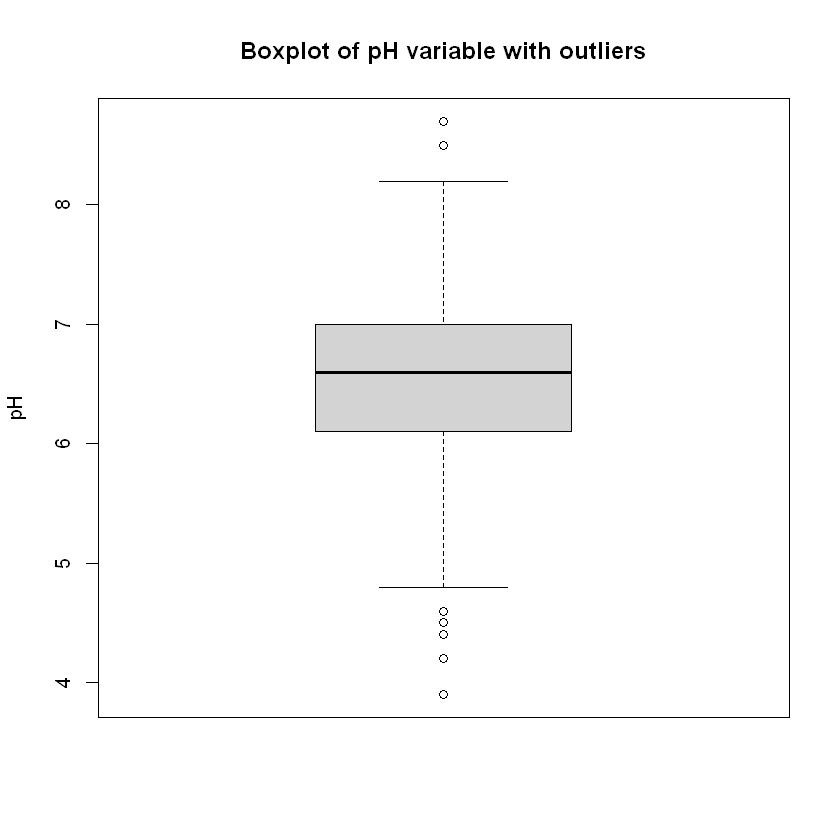

In [22]:
dane <- readRDS("ca_geo.rds")
# Extract pH variable
dane_ph <- dane$pH

# Convert to data frame
new_dane <- as.data.frame(dane_ph)


# Calculate statistics
range_ph <- range(dane_ph, na.rm = TRUE)
mean_ph <- mean(dane_ph, na.rm = TRUE)
median_ph <- median(dane_ph, na.rm = TRUE)
sd_ph <- sd(dane_ph, na.rm = TRUE)
iqr_ph <- IQR(dane_ph, na.rm = TRUE)

# Display statistics
cat("Range of pH values:", range_ph, "\n")
cat("Mean pH value:", mean_ph, "\n")
cat("Median pH value:", median_ph, "\n")
cat("Standard deviation of pH:", sd_ph, "\n")
cat("Interquartile range of pH:", iqr_ph, "\n")

# Create a boxplot
boxplot(dane_ph, main = "Boxplot of pH variable with outliers",
        ylab = "pH", outline = TRUE)
